<a href="https://colab.research.google.com/github/DanielZul24/Inteligencia-Artificial-ZUL/blob/main/P2_Perceptron_PERSONALIZADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El propósito general de este código es implementar un modelo de Perceptrón para clasificar sitios web como phishing o no phishing utilizando un conjunto de datos cargado desde un archivo ARFF.
Este código carga un conjunto de datos desde un archivo ARFF llamado "PhishingData.arff", preprocesa los datos, define y entrena un modelo de perceptrón, y finalmente visualiza los datos y el rendimiento del modelo durante el entrenamiento.

Los gráficos finales representan visualmente la relación entre las características (en este caso, SFH y popUpWidnow) para los sitios web clasificados como phishing (en rojo) y no phishing (en azul). Esto ayuda a comprender cómo se distribuyen los datos y si hay alguna separación clara entre las clases.

Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address',
       'Result'],
      dtype='object')


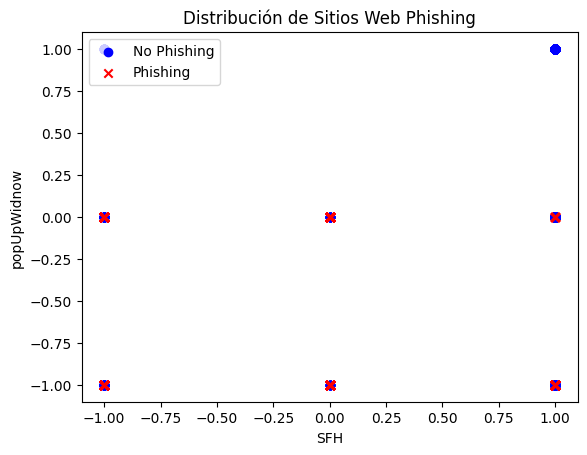

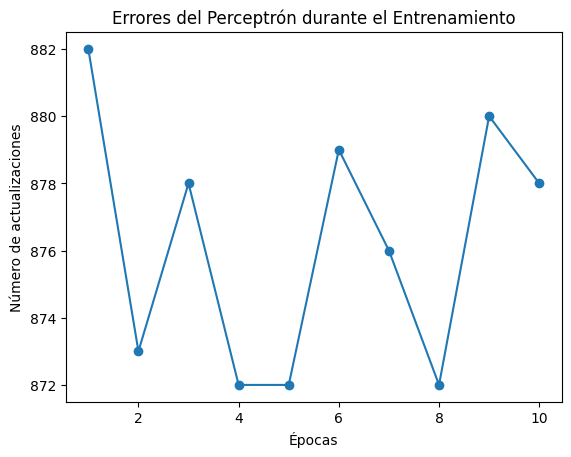

In [7]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff

# Leer el archivo ARFF directamente
data = arff.loadarff('PhishingData.arff')
df = pd.DataFrame(data[0])  # Convertir a DataFrame

# Verificar las columnas del DataFrame
print(df.columns)  # Imprimir los nombres de las columnas

# Preprocesar los datos
y = df['Result'].astype(int).values

# Convertir -1 a 0 para que tengamos solo 0 y 1 como etiquetas
y = np.where(y == -1, 0, y)  # Esto convierte -1 a 0, y deja 1 como está

# Seleccionar características relevantes
X = df[['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL',
         'URL_of_Anchor', 'web_traffic', 'URL_Length',
         'age_of_domain', 'having_IP_Address']].astype(int).values

# Graficar los datos

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', marker='o', label='No Phishing')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='x', label='Phishing')
plt.xlabel('SFH')
plt.ylabel('popUpWidnow')
plt.legend(loc='upper left')
plt.title('Distribución de Sitios Web Phishing')
plt.show()

# Entrenar el modelo de perceptrón
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        # Iterar sobre el número de épocas
        for _ in range(self.n_iter):
            errors = 0  # Contador de errores para la época actual
            # Actualizar los pesos para cada muestra
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))  # Cálculo de la actualización
                self.w_[1:] += update * xi  # Actualización de los pesos
                self.w_[0] += update  # Actualización del sesgo (bias)
                errors += int(update != 0.0)  # Incrementar el contador de errores si hay un cambio
            self.errors_.append(errors)  # Almacenar el número de errores de la época
        return self  # Retornar la instancia ajustada del perceptrón

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Graficar el número de errores durante cada época (iteración)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')
plt.title('Errores del Perceptrón durante el Entrenamiento')
plt.show()
